# Book Recommendation System with KNN
Bu projede kitap özelliklerinden faydalanılarak KNN (En yakın komşu algoritması) kullanılarak
benzer kitaplar tespit edilmeye çalışılmaktadır. 
Böylelikle bir kitabı beğenen bir okura ona benzer başka bir kitap tavsiye edilebilir.
<br> Bu projede kullanılan veriler ve kodlar için <a href="https://thecleverprogrammer.com/2023/10/30/book-recommendation-system-with-python/"
target="_blank">bu sayfadan</a> faydalanılmıştır.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("books_data.csv")

In [3]:
df.head()

,bookID,title,authors,average_rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78


### Veri görselleştirmesi

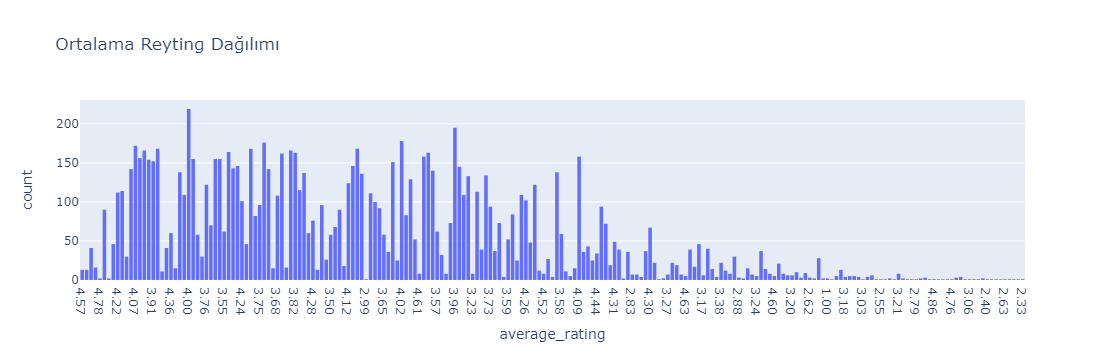

In [7]:
#Kitapların ortalama reyting değerlerine göre dağılımları
px.histogram(df, x='average_rating', nbins=30, title='Ortalama Reyting Dağılımı')

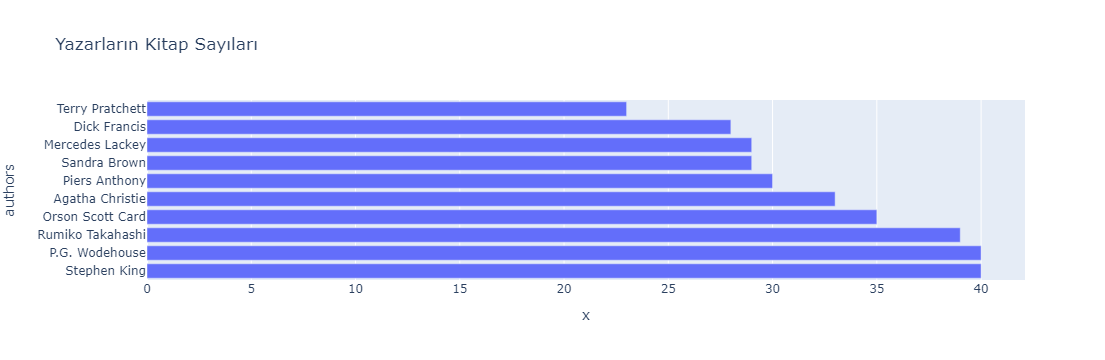

In [10]:
# En çok kitabı olan yazarlar
top_authors = df['authors'].value_counts().head(10)
px.bar(top_authors, x=top_authors.values, y=top_authors.index, title='Yazarların Kitap Sayıları')

### Veri Ön İşleme Adımları 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bookID          11127 non-null  int64 
 1   title           11127 non-null  object
 2   authors         11127 non-null  object
 3   average_rating  11127 non-null  object
dtypes: int64(1), object(3)
memory usage: 347.8+ KB


In [12]:
# Ortalama Reyting alanını sayıya dönüştürelim
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

In [14]:
# Kitap ve Yazar adı alanlarını birleştirelim
df['book_content'] = df['title'] + ' ' + df['authors']

### KNN - En Yakın Komşu Hesaplama

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [17]:
# Kitap bilgilerini kullanarak kelime vektörleri oluşturalım.
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['book_content'])

In [18]:
# Kosinüs uzaklığını hesaplayalım
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [38]:
def kitap_oner(kitap, cosine_sim=cosine_sim):
    try:
        idx = df[df['title'].str.startswith(kitap)].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        book_indices = [i[0] for i in sim_scores]
        return df[["title", "authors"]].iloc[book_indices]
    except:
        return "Bahsettiğiniz kitabı bulamadık"

In [39]:
kitap_oner("The Adventures of Sherlock Holmes")

,title,authors
1063,The Complete Adventures and Memoirs of Sherloc...,Arthur Conan Doyle
1055,Sherlock Holmes: The Complete Novels and Stori...,Arthur Conan Doyle
5248,The Extraordinary Cases of Sherlock Holmes,Arthur Conan Doyle
1062,The Mysteries of Sherlock Holmes,Arthur Conan Doyle/Paul Bachem
2750,The Complete Sherlock Holmes Volume I,Arthur Conan Doyle/Kyle Freeman
2751,The Complete Sherlock Holmes Volume II,Arthur Conan Doyle/Kyle Freeman
2452,The Hound of the Baskervilles (Sherlock Holmes...,Arthur Conan Doyle/David Timson
1057,The New Annotated Sherlock Holmes: The Novels,Arthur Conan Doyle/Leslie S. Klinger
1056,The New Annotated Sherlock Holmes: The Complet...,Arthur Conan Doyle/Leslie S. Klinger
2372,Las aventuras de Sherlock Holmes,Arthur Conan Doyle/Javier Gomez Rea


In [40]:
kitap_oner("The Names")

,title,authors
5620,Conversations with Don DeLillo,Don DeLillo/Thomas DePietro
166,Underworld,Don DeLillo
168,Americana,Don DeLillo
3215,Americana,Don DeLillo
167,Libra,Don DeLillo
170,Cosmopolis,Don DeLillo
5264,Valparaiso,Don DeLillo
7475,Falling Man,Don DeLillo
3217,The Body Artist,Don DeLillo
3214,White Noise,Don DeLillo


### Sonuç:
Bu projede en yakın komşu algoritması kullanılarak kitap öneri sistemi geliştirilmiştir. 
Kitap adı ve yazar bilgilerinden oluşturulan TF/IDF vektör özellikleri kullanılarak kitaplar arasındaki kosinüs uzaklığı hesaplanmıştır.
<br> Örneğin <b>The Adventures of Sherlock Holmes</b> isimli kitaba öneri olarak yine başka Sherlock Holmes kitapları önerilmiştir.
<br> <b>The Names</b> isimli kitaba yine aynı yazarın kitapları önerilmiştir.